In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 and tenure is 0 and no total charges are recorded

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df['customerID'].duplicated().sum()

0

#Converted 0 and 1 values of senior citizen to Yes/No to make it easier to understand

In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0:"No", 1:"Yes"})
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


C:\Users\Puran singh\AppData\Local\Temp\ipykernel_3552\4078152952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=['#3c6484', '#5cb48c'])


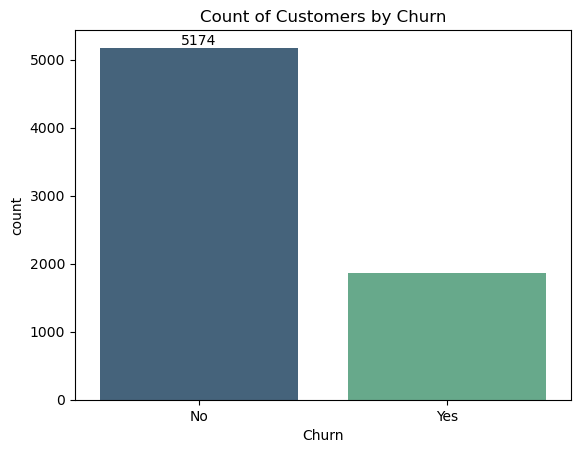

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Churn', data=df, palette=['#3c6484', '#5cb48c'])
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

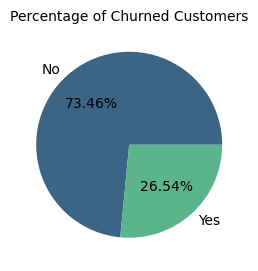

In [91]:
plt.figure(figsize= (3,4))
colors = ['#3c6484' ,'#5cb48c' ]
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%", colors=colors)
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

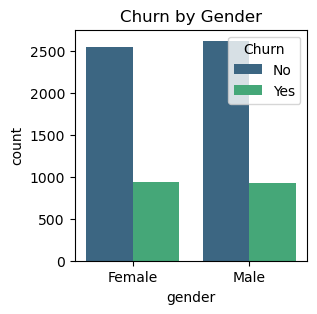

In [85]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'gender', data=df, hue='Churn', palette='viridis')
plt.title("Churn by Gender")
plt.show()

C:\Users\Puran singh\AppData\Local\Temp\ipykernel_3552\1749669423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'SeniorCitizen', data=df , palette='viridis')


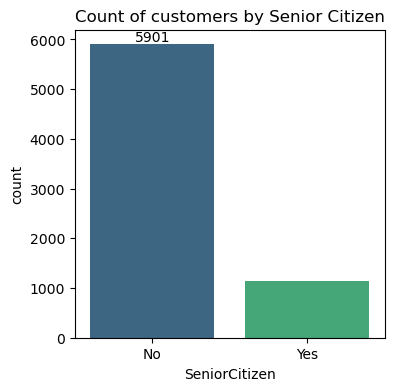

In [84]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'SeniorCitizen', data=df , palette='viridis')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")
plt.show()

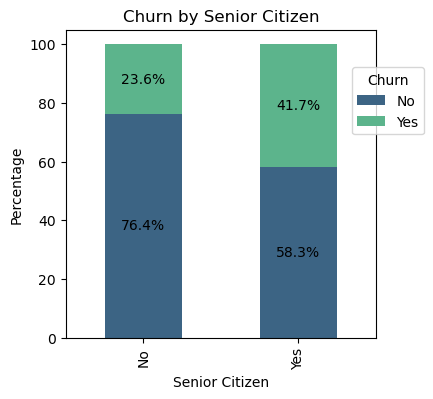

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figure size
cross_tab.plot(kind='bar', stacked=True, ax=ax, color=['#3c6484', '#5cb48c'])

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
            ha='center', va='center', fontsize=10, color='black')

plt.title("Churn by Senior Citizen")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn", bbox_to_anchor=(0.9, 0.9))
plt.show()


#Comparative a greater percentage of people in senior citizen category have churned

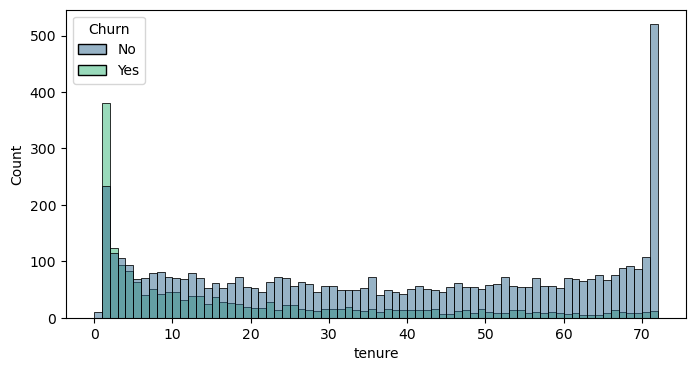

In [79]:
plt.figure(figsize= (8,4))
sns.histplot(x = 'tenure', data=df, bins=72, hue='Churn', palette='viridis')
plt.show()

people who have used our services for a long time have stayed and people who have used our services for #1 or #2 months have churned


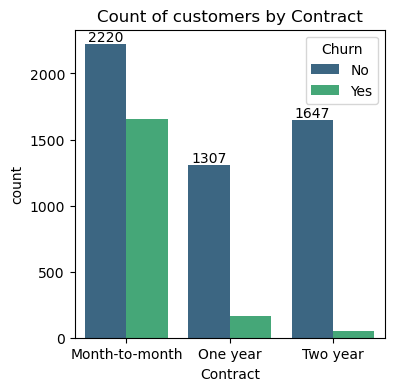

In [78]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data=df, hue='Churn', palette='viridis')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

People who have month to month contract are likely are churn then from those who have one or two years of contract

In [57]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

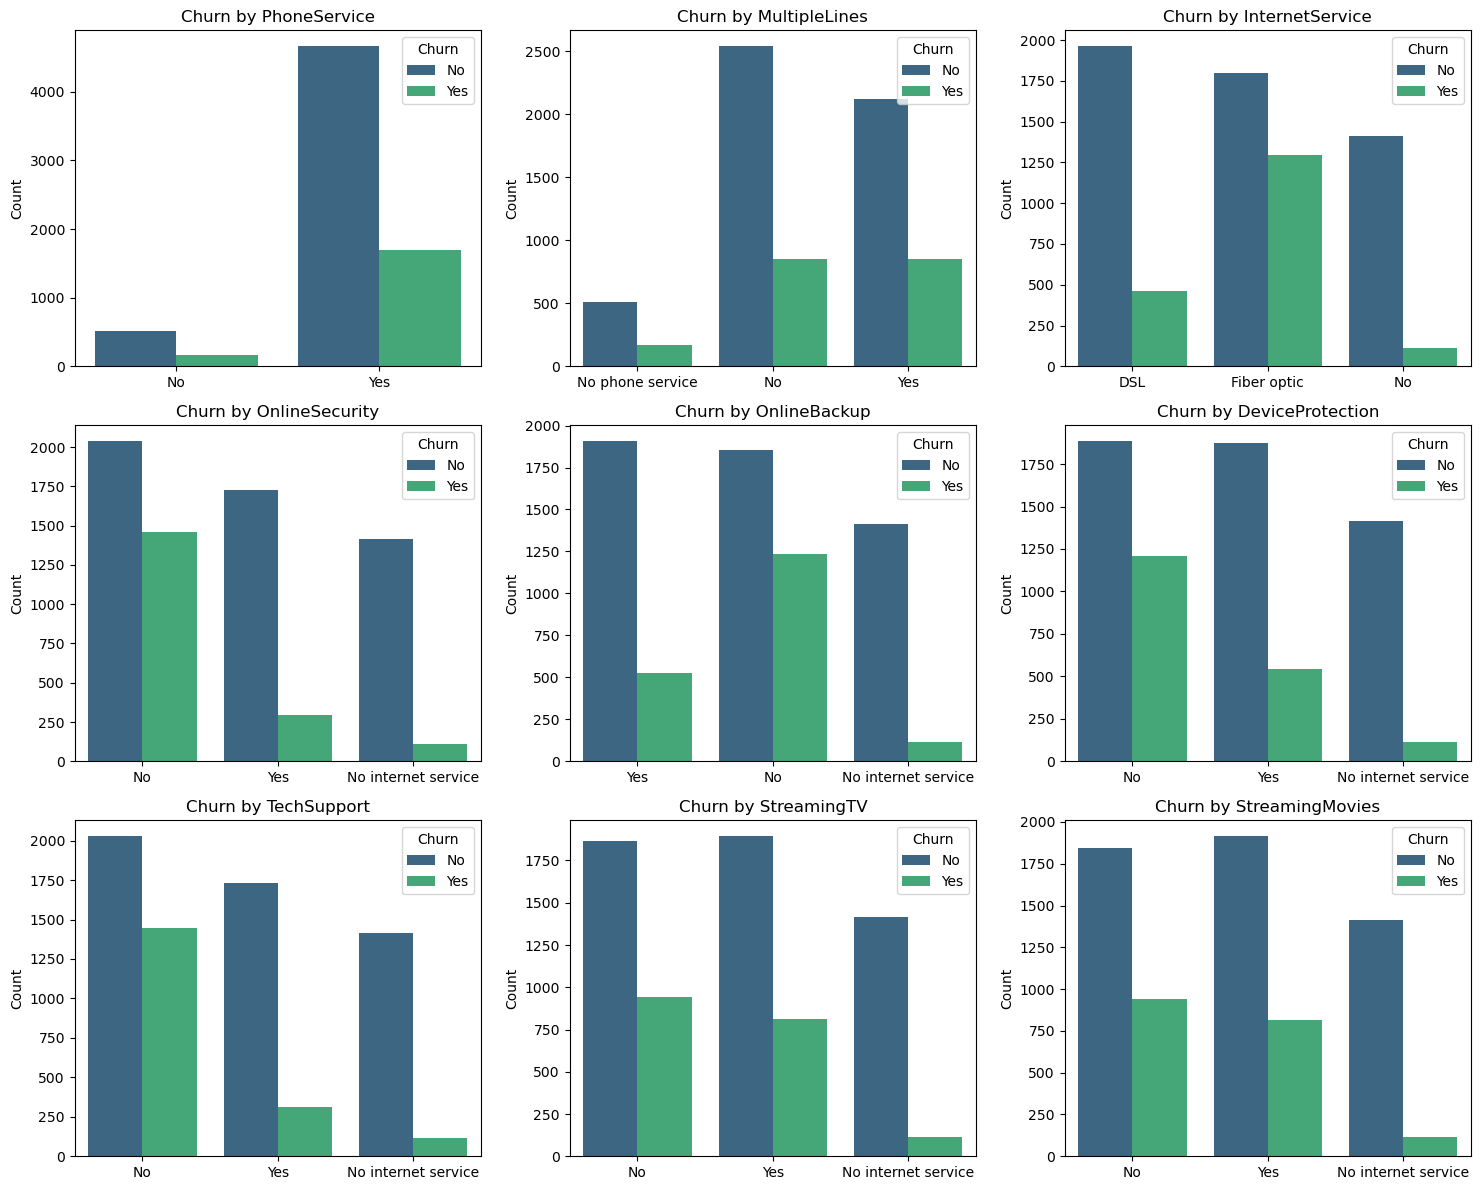

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 cols

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(x=df[col], hue=df['Churn'], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Churn by {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Churn", loc="upper right")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The visualizations show the relationship between customer churn and various telecom services. Customers without security, backup, or support services tend to churn more. Fiber optic internet users also exhibit higher churn rates. Streaming services and multiple lines do not significantly impact churn, while phone service users show lower churn rates

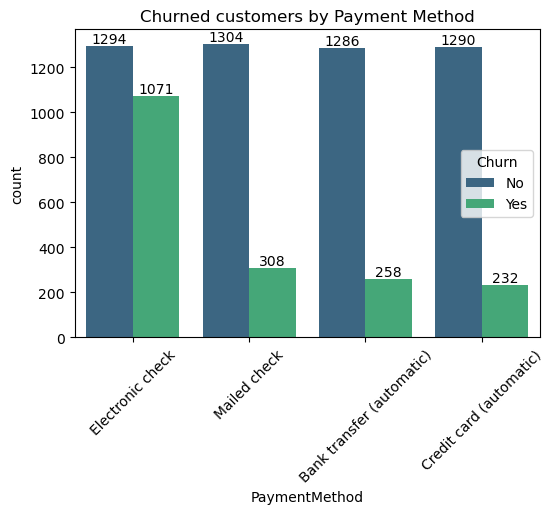

In [100]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'PaymentMethod', data=df, hue='Churn', palette='viridis')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

#Customer is likey to Churn when he is using electronic check as a payment method